In [2]:
import numpy as np
import pandas as pd
#import training set
#Train_df = pd.read_csv('/Users/weisihan/Downloads/we_data/mytrainingsetFM_843.csv')
#Train_dff = pd.read_csv('/Users/weisihan/Downloads/we_data/mytrainingsetFMNo2.csv')
#import validation set
Valid_df = pd.read_csv('/Users/weisihan/Downloads/we_data/myvalidsetFM_845.csv')

In [3]:
Train_df.head()

,click,android,ios,linux,mac,other,windows,chrome,firefox,ie,...,slotwidth_360.1,slotwidth_468.1,slotwidth_620.1,slotwidth_640.1,slotwidth_728.1,slotwidth_760.1,slotwidth_910.1,slotwidth_950.1,slotwidth_960.1,slotwidth_980.1
0,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
drops = ['slotprice_196', 'slotprice_212', 'slotprice_217', 'slotprice_226', 'slotprice_228', 'slotprice_234', 'slotprice_245', 'slotprice_256', 'slotprice_257', 'slotprice_278', 'slotprice_284']
Train_df.drop(drops, inplace=True, axis=1)

In [22]:
Train_df[cols].shape

(244712, 831)

In [21]:
Valid_df[cols].shape

(303925, 831)

In [10]:
# columns of without click
cols=list(Train_df.columns)[1:]

In [12]:
cols

['android',
 'ios',
 'linux',
 'mac',
 'other',
 'windows',
 'chrome',
 'firefox',
 'ie',
 'maxthon',
 'opera',
 'other.1',
 'safari',
 'sogou',
 'theworld',
 '10006',
 '10024',
 '10031',
 '10048',
 '10052',
 '10057',
 '10059',
 '10063',
 '10067',
 '10074',
 '10075',
 '10076',
 '10077',
 '10079',
 '10083',
 '10093',
 '10102',
 '10110',
 '10111',
 '10114',
 '10115',
 '10116',
 '10117',
 '10118',
 '10120',
 '10123',
 '10125',
 '10126',
 '10127',
 '10129',
 '10130',
 '10131',
 '10133',
 '10138',
 '10140',
 '10142',
 '10145',
 '10146',
 '10147',
 '10148',
 '10149',
 '10684',
 '11092',
 '11278',
 '11379',
 '11423',
 '11512',
 '11576',
 '11632',
 '11680',
 '11724',
 '11944',
 '13042',
 '13403',
 '13496',
 '13678',
 '13776',
 '13800',
 '13866',
 '13874',
 '14273',
 '15398',
 '16593',
 '16617',
 '16661',
 '16706',
 '16751',
 '16753',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'hour_0',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour

In [13]:
#train = Train_df
y_tr = Train_df['click']
X_tr = Train_df[cols]

y_te = Valid_df['click']
X_te = Valid_df[cols]

In [14]:
X_te=X_te.values
X_tr=X_tr.values

In [16]:
y_te=y_te.values
y_tr=y_tr.values

In [15]:
import scipy.sparse as sp
# only CSR format supported
X_tr_sparse = sp.csr_matrix(X_tr)
X_te_sparse = sp.csr_matrix(X_te)

In [29]:
#23:33
#train Factorised Machine model
from tffm import TFFMClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

model = TFFMClassifier(
    order=3, 
    rank=12, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
    n_epochs=100, 
    batch_size=1024,
    init_std=0.001,
    reg=0.01,
    input_type='sparse',
    seed=42
)

model.fit(X_tr_sparse, y_tr, show_progress=True)

test_predictions = model.predict_proba(X_te_sparse)
test_predictions_class = model.predict(X_te_sparse)

acc = accuracy_score(y_te, test_predictions_class)
print('model: {}'.format(model.__str__()))
print("the accuracy is: {0:6f}".format(acc))
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(y_te, test_predictions[:,1])))
print("==================================")


100%|██████████| 100/100 [03:20<00:00,  2.00s/epoch]
/Users/weisihan/Downloads/tffm-master/tffm/utils.py:195: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


model: TFFMClassifier()
the accuracy is: 0.996361
the AUC for XGBoost is: 0.769253


In [48]:
#23:33
#train Factorised Machine model
from tffm import TFFMClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


model = TFFMClassifier(
    order=3, 
    rank=5, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
    n_epochs=7, 
    batch_size=1024,
    init_std=0.001,
    reg=0.01,
    input_type='sparse',
    seed=42
)

model.fit(X_tr_sparse, y_tr, show_progress=True)

test_predictions = model.predict_proba(X_te_sparse)
test_predictions_class = model.predict(X_te_sparse)

acc = accuracy_score(y_te, test_predictions_class)
print('model: {}'.format(model.__str__()))
print("the accuracy is: {0:6f}".format(acc))
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(y_te, test_predictions[:,1])))
print("==================================")



100%|██████████| 7/7 [00:10<00:00,  1.54s/epoch]


model: TFFMClassifier()
the accuracy is: 0.999181
the AUC for XGBoost is: 0.851166


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



acc = accuracy_score(y_te, test_predictions_class)
print ("the AUC for FM is: {0:6f}".format(roc_auc_score(y_te, test_predictions[:,1])))

the AUC for FM is: 0.858078


In [49]:
test_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
test_result['click']= Valid_df['click'].copy()
test_result['click_pred_per'] = test_predictions[:,1]
test_result['click_pred_class'] = test_predictions_class
test_result.head()

,click,click_pred_per,click_pred_class
0,0,0.001614,0
1,0,0.000941,0
2,0,0.000159,0
3,0,0.000677,0
4,0,0.001198,0


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test = test_result['click']
y_pred_class = test_result['click_pred_class']

print(confusion_matrix(y_test, y_pred_class))

confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN / float(TN+FP)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity = TN / float(TN+FP)
print ("False Positive Rate: %.6f%%" %((1 - specificity)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision = precision_score(y_test, y_pred_class)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f1 = f1_score(y_test, y_pred_class)
print ("F1 score: %.6f%%" %(f1*100.0))

[[303644     79]
 [   170     32]]
TP: 32
TN: 303644
FP: 79
FN: 170
Accuracy: 99.918072%
Recall: 99.918072%
Specificity: 99.973989%
False Positive Rate: 0.026011%
Precision: 28.828829%
F1 score: 20.447284%


In [51]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt


# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC_curve(data, prediction):
    """
    Function to plot the ROC curve with AUC.
    """

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(data, prediction)
    roc_auc = roc_auc_score(data, prediction)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC curve for CTR')
    plt.grid(True)
    plt.legend(loc="lower right")
    
    return





the AUC for XGBoost is: 0.851166


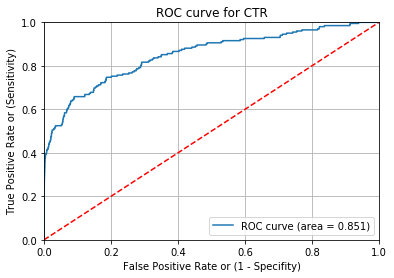

In [52]:
plot_ROC_curve(test_result['click'], test_result['click_pred_per'])
#tffm的auc
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result['click'], test_result['click_pred_per'])))

## Different optimizers

Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 5/5 [00:06<00:00,  1.34s/epoch]


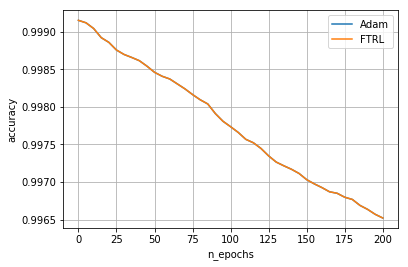

In [54]:
%pylab inline
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
    order=3, 
    rank=5, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
    n_epochs=7, 
    batch_size=1024,
    init_std=0.001,
    reg=0.01,
    input_type='sparse',
    seed=42
    )

    n_epochs = 5
    anchor_epochs = range(0, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(X_tr_sparse, y_tr, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict(X_te_sparse)
        acc.append(accuracy_score(y_te, predictions))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('accuracy')
legend()
grid()




Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 5/5 [00:06<00:00,  1.33s/epoch]


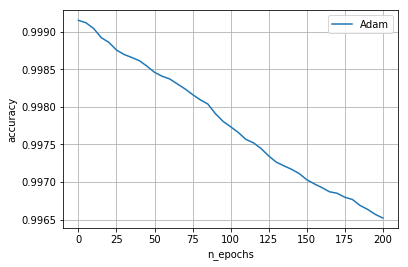

In [55]:
%pylab inline
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam')]:
    acc = []
    model = TFFMClassifier(
    order=3, 
    rank=5, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
    n_epochs=7, 
    batch_size=1024,
    init_std=0.001,
    reg=0.01,
    input_type='sparse',
    seed=42
    )

    n_epochs = 5
    anchor_epochs = range(0, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(X_tr_sparse, y_tr, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict(X_te_sparse)
        acc.append(accuracy_score(y_te, predictions))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('accuracy')
legend()
grid()





Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 5/5 [00:13<00:00,  2.78s/epoch]
/Users/weisihan/Downloads/tffm-master/tffm/utils.py:195: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
100%|██████████| 5/5 [00:14<00:00,  2.86s/epoch]


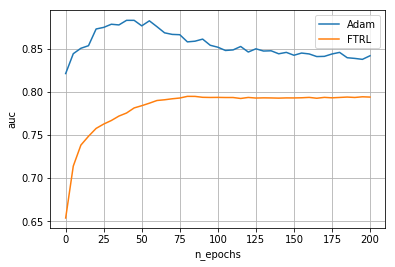

In [246]:
%pylab inline
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
        order=3, 
        rank=10, 
        optimizer=optim,
        batch_size=1024,
        init_std=0.001,
        reg=0.1,
        input_type='dense',
    )
    n_epochs = 5
    anchor_epochs = range(0, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(train_x, train_y, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict_proba(X_te)
        acc.append(roc_auc_score(y_te, predictions[:,1]))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('auc')
legend()
grid()

In [ ]:
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result['click'], test_result['click_pred_per'])))



Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 10/10 [00:52<00:00,  5.29s/epoch]
/Users/weisihan/Downloads/tffm-master/tffm/utils.py:195: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
100%|██████████| 10/10 [00:50<00:00,  5.05s/epoch]


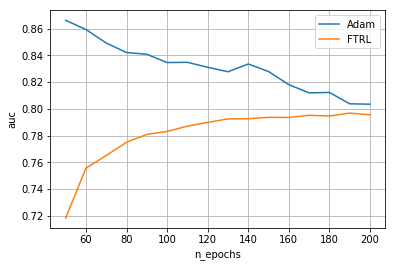

In [12]:
%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
        order=5, 
        rank=12, 
        optimizer=optim,
        batch_size=1024,
        init_std=0.001,
        reg=0.1,
        input_type='dense',
    )
    n_epochs = 10
    anchor_epochs = range(50, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(train_x, train_y, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict_proba(X_te)
        acc.append(roc_auc_score(y_te, predictions[:,1]))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('auc')
legend()
grid()